# Exploring Exoplanets using multiple Machine Learning methods



## Start with loading basic packages

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv("../exoTrain.csv")
df_const = df.copy()
df.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


There are 5087 observations(rows) and 3198 features(columns).

In [2]:
# Extract feature names Flux 1-3197 into an array
x = df.iloc[:, 1:]
features = x.columns.values
print(features)

['FLUX.1' 'FLUX.2' 'FLUX.3' ... 'FLUX.3195' 'FLUX.3196' 'FLUX.3197']


In [3]:
# Extract Flux 1-3197 values into an array
flux = x.values
# Extract Label feature into an array
label = df.loc[:,['LABEL']].values

print(flux.shape)
print(label.shape)

(5087, 3197)
(5087, 1)


Well, the time variable does not show clearly enough about what 0-3196 represents.
Let us change this a bit.
In this mission, NASA mentioned that the data was collected for approximately 
80 days. So, let us change the time unit in hours.
To get time between two fluxs interval, we calculate as follows:

(80 days * 24 hours * 60 minutes * 60 seconds) / 3197 fluxes.

So, each flux is separated by approximately 36 minutes or 2162 seconds.


In [4]:
time = np.arange(len(features)) * (36.0/60.0)
print(time)
print(time.shape)

[0.0000e+00 6.0000e-01 1.2000e+00 ... 1.9164e+03 1.9170e+03 1.9176e+03]
(3197,)


## Visualing Raw Data of Confirmed Exoplanets and Non-Exoplanets
#### Graph of everal confirmed Exoplanets
Note: Obs=1 means the first observation, Obs=6 means the sixth observation and so on

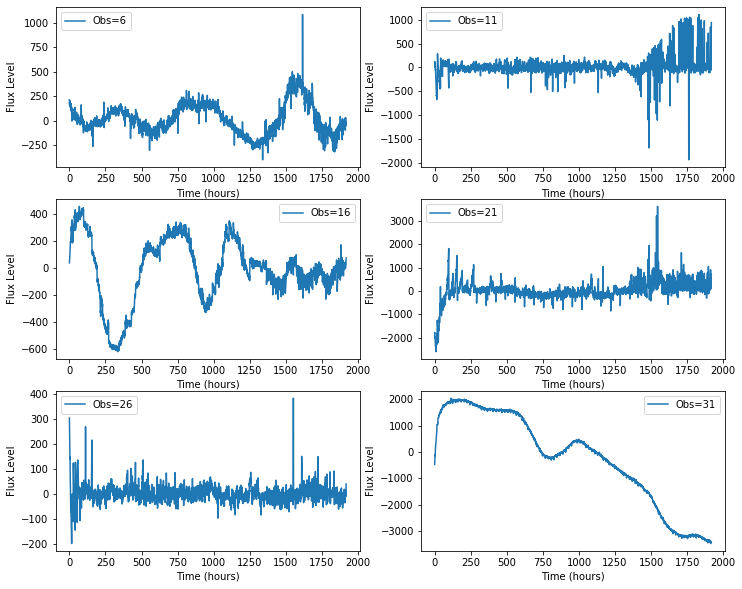

In [5]:
# Display 6 confirmed exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*5
    ax.plot(time, flux[step,:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Flux Level')
    ax.legend([('Obs=' + str(step+1))])

#### Graph of several confirmed non-Exoplanets

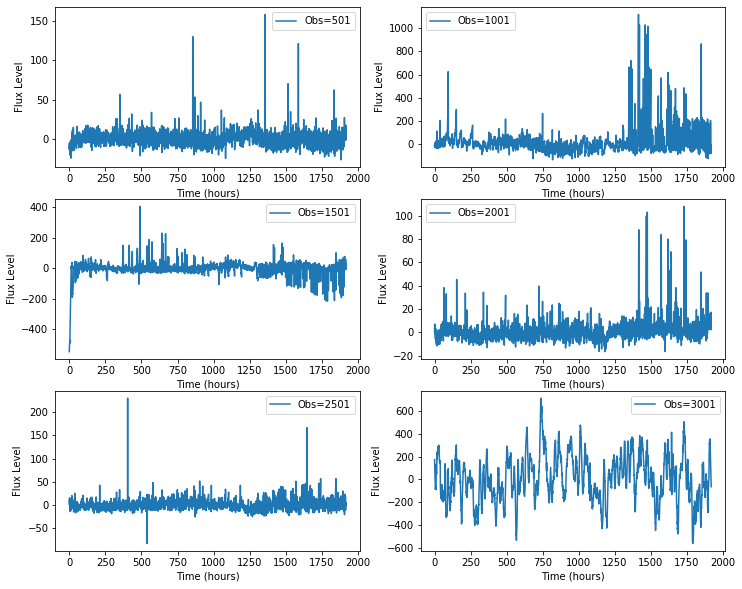

In [6]:
# Display 6 confirmed non-exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*500
    ax.plot(time, flux[step,:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Flux Level')
    ax.set_ylabel('Flux Level')
    ax.legend([('Obs=' + str(step+1))])

### Zoom in the graph
Zoom in to see if there anything we can deduct from the graph

Text(0, 0.5, 'Flux Level')

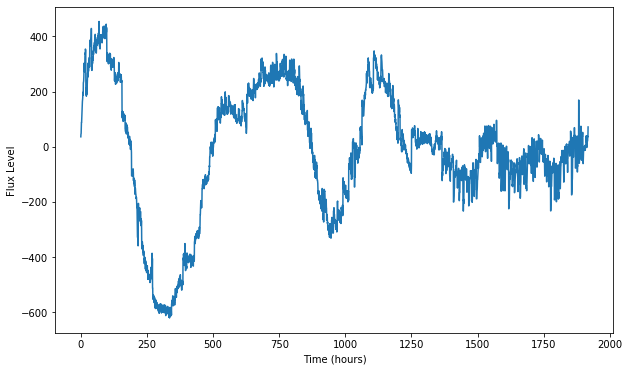

In [7]:
# Plot the graph for the observation 16 that is a confirmed exoplanet
plt.figure(figsize=(10, 6))
plt.plot(time, flux[15,:])
plt.xlabel('Time (hours)')
plt.ylabel('Flux Level')

In [8]:
## Filtering the noise using gaussian filter

Text(0.5, 1.0, 'Flux Level of Observation 11 With Confirmed Exoplanet')

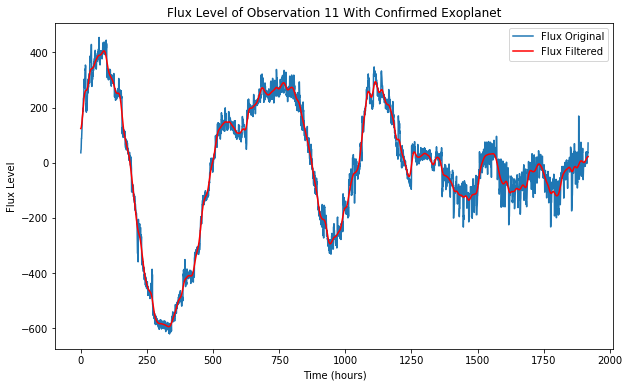

In [9]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter

flux_original = flux[15,:]
flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=10)

plt.figure(figsize=(10,6))
plt.plot(time, flux_original, label='Flux Original')
plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
plt.legend(loc='upper right')
plt.xlabel('Time (hours)')
plt.ylabel('Flux Level')
plt.title('Flux Level of Observation 11 With Confirmed Exoplanet')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def detrender_normalizer(X):
    flux_original = X
    flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=11)
    flux_detrend = flux_original - flux_filtered
    flux_normalized = (flux_detrend-np.mean(flux_detrend)) / (np.max(flux_detrend)-np.min(flux_detrend))
    #flux_normalized = (flux_filtered-np.mean(flux_filtered)) / (np.max(flux_filtered)-np.min(flux_filtered))
    return flux_normalized

In [11]:
df_train = df.copy()
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
flux_norm = df_train.iloc[:,1:].values
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [12]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Since we are looking at dips in the data, we should remove upper outliers.
    The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                #df.set_value(i,idx,new_val) deprecated use.at[] or .iat[] instead
                df.at[i, idx] = new_val
        
    return df

In [13]:
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [14]:
df_test = pd.read_csv("../exoTest.csv")
df_test_const = df_test.copy()
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [15]:
df_test.iloc[:, 1:] = df_test.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_test.iloc[:, 1:] = reduce_upper_outliers(df_test.iloc[:, 1:])

In [16]:
df_test.shape

(570, 3198)

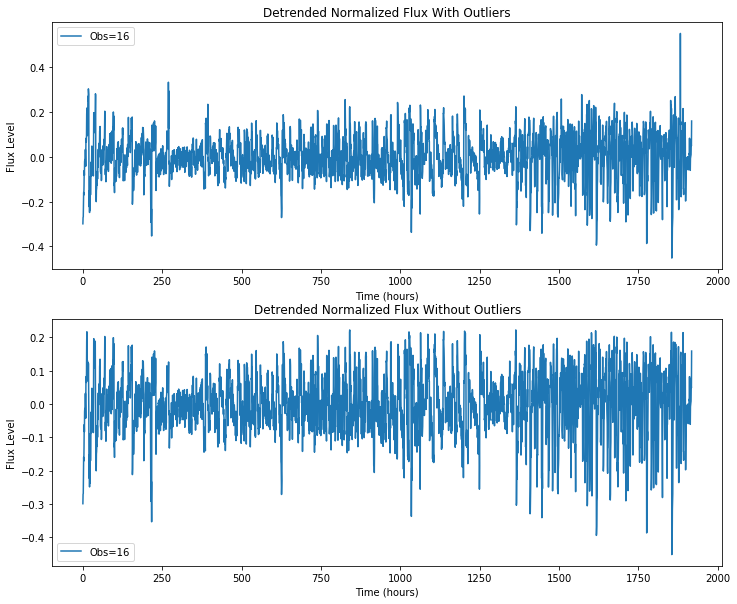

In [17]:
fig1 = plt.figure(figsize=(12, 10))
ax1 = fig1.add_subplot(211)
ax1.plot(time, flux_norm[15,:])
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Flux Level')
ax1.set_title('Detrended Normalized Flux With Outliers')
ax1.legend([('Obs=16')])
           
ax2 = fig1.add_subplot(212)
ax2.plot(time, df_train.iloc[15, 1:])
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Flux Level')
ax2.set_title('Detrended Normalized Flux Without Outliers')
ax2.legend([('Obs=16')])

plt.show()

In [18]:
# Load training and test data into predictor and target variables
X_train = df_train.iloc[:, 1:]
X_test = df_test.iloc[:, 1:]

y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [19]:
df.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

If you see there are only 37 confirmed Exoplanets available in the dataset. It is hard to produce a good prediction with limited confirmed Exoplanets. Due to this imbalanced data, we can create synthetic data based on actual dataset by using SMOTE technique

In [20]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
df_const.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [21]:
X_smt = df_const.iloc[:,1:]
y_smt = df_const.iloc[:, 0]
X_smt, y_smt = smt.fit_sample(X_train, y_train)
print(X_smt.shape)
print(y_smt.shape)

(10100, 3197)
(10100,)


In [22]:
features = list(df_const.iloc[:,1:].columns.values)
df_train = pd.DataFrame(data = X_smt, columns = features)
label_train = pd.DataFrame(data = y_smt, columns = ['LABEL'])
df_train = pd.concat([label_train, df_train], axis = 1)
print(df_train.shape)

(10100, 3198)


In [23]:
df_train.LABEL.value_counts()

2    5050
1    5050
Name: LABEL, dtype: int64

We now have both Exoplanets and non-Exoplanets equal in number. The process of detrending and normalizing data is repeated one more time.

In [24]:
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_train.head(-1)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.109740,0.102769,0.056864,0.023494,0.015720,-0.044904,-0.050571,-0.019851,-0.005445,...,-0.058993,-0.078266,-0.079675,0.012349,0.028526,0.059927,0.020324,0.036051,-0.005513,-0.038342
1,2,0.069505,0.081053,0.020908,0.063425,-0.032502,-0.019663,-0.055786,-0.056704,-0.057851,...,0.006712,-0.063638,-0.064718,-0.048190,-0.001156,0.011548,-0.018846,0.024120,0.046623,0.055866
2,2,0.041751,0.045047,0.019783,0.000158,-0.045994,-0.036988,-0.040476,-0.018244,-0.075648,...,-0.045987,0.048500,0.048828,0.001299,0.011630,0.040702,0.022297,0.003558,-0.041848,-0.071303
3,2,-0.007397,0.106944,-0.142264,-0.167114,-0.061044,-0.090873,-0.039823,-0.102155,-0.097039,...,0.064092,0.008185,0.004602,0.187431,0.129432,-0.053054,-0.033513,-0.082015,-0.083222,0.088833
4,2,-0.042090,-0.046139,-0.052089,-0.044847,-0.032318,-0.028018,-0.018548,-0.039299,-0.033169,...,-0.056230,0.032660,0.028933,0.047063,0.002431,0.002531,0.019319,0.025114,0.011028,-0.037128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,2,0.222438,0.252623,0.151756,0.094209,0.135962,0.141716,0.028114,-0.008854,-0.019318,...,0.327316,-0.237204,-0.242902,-0.171346,-0.167151,-0.085212,0.009622,0.111249,0.119651,0.147173
10095,2,0.235504,0.300824,0.224587,0.176125,0.240480,0.050009,-0.007302,0.064139,-0.049429,...,-0.034944,-0.174990,-0.043511,-0.079797,0.041318,0.123421,0.057824,0.123204,-0.006526,0.063458
10096,2,-0.085194,-0.040692,-0.054374,-0.003064,-0.054162,0.009791,-0.018504,0.036624,-0.000755,...,0.020197,-0.048362,-0.036663,-0.066674,-0.015367,0.017805,0.019690,0.036393,0.069989,0.059052
10097,2,-0.161100,-0.214914,-0.199418,-0.115695,-0.092167,-0.081538,-0.021981,-0.017794,0.007945,...,0.075340,-0.025822,-0.024181,-0.065124,-0.081699,-0.022621,0.011228,0.025688,0.043194,0.068713


In [25]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

In [26]:
%%time
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=2000)
logisticRegr.fit(X_train, y_train)
lr_pred = logisticRegr.predict(X_test)
logisticRegr.score(X_test , y_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(lr_pred, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)
df_confusion

Wall time: 2.21 s


Predicted,1
Actual,
1,565
2,5


In [27]:
%%time
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, y_train)
svm_pred = svclassifier.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(svm_pred, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)
df_confusion

Wall time: 30.3 s


Predicted,1
Actual,
1,565
2,5


The models have yet be able to predict correctly eventhough numbers of confirmed Exoplanets have been added.

## Analyzing through frequency spectrum
Instead of solving the problem through raw flux data, we can solve by transforming the data to frequency. Since the flux is a signal, we can use Fast Fourier Transform method to convert the signal to frequency.

In [28]:
# Import appropriate package
import scipy

def spectrum_getter(X) :
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [29]:
# Load flux of training and test data into predictor and target variables
X_train_sp = df_train.iloc[:, 1:]
X_test_sp = df_test.iloc[:, 1:]

In [30]:
X_train_sp = X_train_sp.apply(spectrum_getter, axis=1)
X_test_sp = X_test_sp.apply(spectrum_getter, axis=1)
X_train_list = np.array(X_train_sp.values.tolist())
X_test_list = np.array(X_test_sp.values.tolist())
print(X_train_list.shape)
print(X_test_list.shape)

(10100, 3197)
(570, 3197)


In [31]:
label_train = pd.DataFrame(data = y_train, columns = ['LABEL'])
label_test = pd.DataFrame(data = y_test, columns = ['LABEL'])

In [32]:
flux_features = []
for k in range(1, 3198):
    s = 'FLUX.' + str(k)
    flux_features.append(s)

In [50]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train_list)
X_train_norm = scaler.transform(X_train_list)
X_test_norm = scaler.transform(X_test_list)

In [51]:
df_temp_train = pd.DataFrame(data = X_train_norm, columns = flux_features)
df_train = pd.concat([label_train, df_temp_train], axis = 1)

df_temp_test = pd.DataFrame(data = X_test_norm, columns = flux_features)
df_test = pd.concat([label_test, df_temp_test], axis = 1)

print(df_train.shape)
print(df_test.shape)

(10100, 3198)
(570, 3198)


In [52]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

print(X_train.shape)
print(y_train.shape)

(10100, 3197)
(10100,)


In [53]:
%%time
from sklearn.metrics import precision_score, \
    recall_score, accuracy_score, f1_score

logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=400)
logisticRegr.fit(X_train, y_train)

predicted = logisticRegr.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, predicted, pos_label= 2))

confusion_mat

F1 score: 0.6
Recall: 0.6
Precision: 0.6
Wall time: 4.74 s


Predicted,1,2
Actual,,
1,563,2
2,2,3


In [54]:
%%time
svclassifier = SVC(kernel='linear', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, y_train)
svm_predicted = svclassifier.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(svm_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, svm_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, svm_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, svm_predicted, pos_label= 2))

confusion_mat

F1 score: 0.6666666666666665
Recall: 0.6
Precision: 0.75
Wall time: 21.9 s


Predicted,1,2
Actual,,
1,564,1
2,2,3


In [65]:
%%time
import xgboost
xgb = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(xgb_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, xgb_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, xgb_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, xgb_predicted, pos_label= 2))

confusion_mat

F1 score: 0.7272727272727272
Recall: 0.8
Precision: 0.6666666666666666
Wall time: 17min 57s


Predicted,1,2
Actual,,
1,563,2
2,1,4


In [55]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_predicted = dtc.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(dtc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, dtc_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, dtc_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, dtc_predicted, pos_label= 2))

confusion_mat

F1 score: 0.14285714285714285
Recall: 0.4
Precision: 0.08695652173913043
Wall time: 1min 15s


Predicted,1,2
Actual,,
1,544,21
2,3,2


In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(rfc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, rfc_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, rfc_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, rfc_predicted, pos_label= 2))

confusion_mat

F1 score: 0.7499999999999999
Recall: 0.6
Precision: 1.0
Wall time: 3min 41s


Predicted,1,2
Actual,,
1,565,0
2,2,3


In [57]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(gnb_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, gnb_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, gnb_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, gnb_pred, pos_label= 2))

confusion_mat

F1 score: 0.01792114695340502
Recall: 1.0
Precision: 0.009041591320072333
Wall time: 1.6 s


Predicted,1,2
Actual,,
1,17,548
2,0,5


In [58]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
knn_pred = neigh.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(knn_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, knn_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, knn_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, knn_pred, pos_label= 2))

confusion_mat

F1 score: 0.3
Recall: 0.6
Precision: 0.2
Wall time: 49.4 s


Predicted,1,2
Actual,,
1,553,12
2,2,3


In [56]:
%%time
from sklearn.ensemble import VotingClassifier

lgr = LogisticRegression(solver = 'lbfgs', max_iter=200)
svc = SVC(kernel='linear', random_state=1, gamma=.01, C=1)
neigh = KNeighborsClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=300)
dtc = DecisionTreeClassifier()
xgb = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

clf = VotingClassifier(estimators=[
        ('lr', logisticRegr), ('svc', svclassifier), ('knn', neigh),
        ('rfc', rfc), ('dtc', dtc), ('xgb', xgb), ('nb', gnb)], voting='hard')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(clf_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, clf_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, clf_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, clf_pred, pos_label= 2))

confusion_mat

F1 score: 0.6666666666666665
Recall: 0.6
Precision: 0.75
Wall time: 24min 32s


Predicted,1,2
Actual,,
1,564,1
2,2,3


In [66]:
%%time
from sklearn.ensemble import BaggingClassifier
lgr = LogisticRegression(solver = 'lbfgs', max_iter=400)
num_trees = 30
seed = 7
bgc = BaggingClassifier(base_estimator = lgr, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
bgc_pred = bgc.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(bgc_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, bgc_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, bgc_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, bgc_pred, pos_label= 2))

confusion_mat

F1 score: 0.6
Recall: 0.6
Precision: 0.6
Wall time: 2min 4s


Predicted,1,2
Actual,,
1,563,2
2,2,3


In [75]:
%%time
from sklearn.ensemble import BaggingClassifier
cart = DecisionTreeClassifier()
num_trees = 30
seed = 8
bgc = BaggingClassifier(base_estimator = cart, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
y_pred_bgc = bgc.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_bgc, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Wall time: 18min 25s


Predicted,1,2
Actual,,
1,565,0
2,3,2


In [85]:
%%time
estim = 100
max_feautures = 'auto'
num_trees = 100
seed = 8
rfc = RandomForestClassifier(n_estimators=estim, 
                             bootstrap=True, 
                          max_features='auto')
bgc = BaggingClassifier(base_estimator = rfc, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, Y_train)
y_pred_bgc = bgc.predict(X_test)
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(y_pred_bgc, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Wall time: 1h 2min 34s


Predicted,1,2
Actual,,
1,565,0
2,3,2


In [60]:
%%time
from sklearn.ensemble import AdaBoostClassifier
lgr = LogisticRegression(solver = 'lbfgs', max_iter=400)
ada = AdaBoostClassifier(base_estimator=lgr, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.5333333333333333
Recall: 0.8
Precision: 0.4
Wall time: 2min 2s


Predicted,1,2
Actual,,
1,559,6
2,1,4


In [68]:
%%time
from sklearn.ensemble import AdaBoostClassifier
xgb = xgboost.XGBClassifier()
ada = AdaBoostClassifier(base_estimator=lgr, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.5333333333333333
Recall: 0.8
Precision: 0.4
Wall time: 2min 1s


Predicted,1,2
Actual,,
1,559,6
2,1,4


In [62]:
%%time
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge')
ada = AdaBoostClassifier(base_estimator=sgd, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.5000000000000001
Recall: 0.8
Precision: 0.36363636363636365
Wall time: 1min 13s


Predicted,1,2
Actual,,
1,558,7
2,1,4


In [63]:
%%time
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
ada = AdaBoostClassifier(base_estimator=gnb, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.1395348837209302
Recall: 0.6
Precision: 0.07894736842105263
Wall time: 1min 26s


Predicted,1,2
Actual,,
1,530,35
2,2,3


In [64]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predicted = dtc.predict(X_test)
ada = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.14814814814814814
Recall: 0.4
Precision: 0.09090909090909091
Wall time: 2min 15s


Predicted,1,2
Actual,,
1,545,20
2,3,2


In [69]:
df_train_sh = df_train.sample(frac=1).reset_index(drop=True)
df_test_sh = df_test.sample(frac=1).reset_index(drop=True)
df_train_sh.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.116462,0.155376,0.101368,0.002147,0.086148,0.161490,0.223829,0.266751,0.217584,...,0.192933,0.134638,0.217584,0.266751,0.223829,0.161490,0.086148,0.002147,0.101368,0.155376
1,2,0.552474,0.625674,0.508769,0.213412,0.262885,0.339094,0.194394,0.416017,0.644253,...,0.378066,0.537064,0.644253,0.416017,0.194394,0.339094,0.262885,0.213412,0.508769,0.625674
2,2,0.100994,0.163437,0.197202,0.199821,0.232850,0.278379,0.270094,0.281316,0.284299,...,0.314546,0.260426,0.284299,0.281316,0.270094,0.278379,0.232850,0.199821,0.197202,0.163437
3,1,0.538211,0.253272,0.197766,0.313610,0.109107,0.126385,0.275931,0.226924,0.327709,...,0.264363,0.212543,0.327709,0.226924,0.275931,0.126385,0.109107,0.313610,0.197766,0.253272
4,2,0.504608,0.390920,0.330535,0.137789,0.269624,0.445519,0.431588,0.657388,0.333583,...,0.307783,0.193132,0.333583,0.657388,0.431588,0.445519,0.269624,0.137789,0.330535,0.390920


In [70]:
X_train_sh = df_train_sh.iloc[:, 1:].values
X_test_sh = df_test_sh.iloc[:, 1:].values

y_train_sh = df_train_sh.iloc[:, 0].values
y_test_sh = df_test_sh.iloc[:, 0].values

In [71]:
%%time
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=200)
logisticRegr.fit(X_train_sh, y_train_sh)

predicted = logisticRegr.predict(X_test_sh)
target_actual = pd.Series(y_test_sh, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test_sh, predicted,pos_label= 2))
print ('Recall:', recall_score(y_test_sh, predicted,pos_label= 2))
print ('Precision:', precision_score(y_test_sh, predicted, pos_label= 2))

confusion_mat

F1 score: 0.6
Recall: 0.6
Precision: 0.6
Wall time: 4.1 s


Predicted,1,2
Actual,,
1,563,2
2,2,3


In [72]:
%%time
from sklearn.ensemble import AdaBoostClassifier
lgr = LogisticRegression(solver = 'lbfgs', max_iter=400)
ada = AdaBoostClassifier(base_estimator=lgr, n_estimators=100, random_state=0)
ada.fit(X_train_sh, y_train_sh)
y_pred_ada = ada.predict(X_test_sh)

target_actual = pd.Series(y_test_sh, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Wall time: 2min 2s


Predicted,1,2
Actual,,
1,559,6
2,1,4


In [73]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(X_train_sh, y_train_sh)
dtc_predicted = dtc.predict(X_test_sh)
ada = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train_sh, y_train_sh)
y_pred_ada = ada.predict(X_test_sh)
target_actual = pd.Series(y_test_sh, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Wall time: 2min 15s


Predicted,1,2
Actual,,
1,545,20
2,3,2


In [74]:
%%time
rfc = RandomForestClassifier(n_estimators=300)
ada = AdaBoostClassifier(base_estimator=rfc, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train_sh, y_train_sh)
y_pred_ada = ada.predict(X_test_sh)

target_actual = pd.Series(y_test_sh, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test_sh, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test_sh, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test_sh, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.7499999999999999
Recall: 0.6
Precision: 1.0
Wall time: 3min 14s


Predicted,1,2
Actual,,
1,565,0
2,2,3
